In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/Sourov1722/Decision-Tree/refs/heads/main/heart.csv"
df = pd.read_csv(url)

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
df.fillna(df.median(numeric_only=True), inplace=True)


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])


In [9]:
X = df.drop('target', axis=1)
y = df['target']


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3,5,7,10,None],
    'min_samples_split': [2,5,10]
}

cart = DecisionTreeClassifier(
    criterion='gini',
    random_state=42
)

grid_cart = GridSearchCV(cart, param_grid, cv=5)
grid_cart.fit(X_train, y_train)

best_cart = grid_cart.best_estimator_
grid_cart.best_params_


{'max_depth': None, 'min_samples_split': 2}

In [12]:
id3 = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)

grid_id3 = GridSearchCV(id3, param_grid, cv=5)
grid_id3.fit(X_train, y_train)

best_id3 = grid_id3.best_estimator_
grid_id3.best_params_


{'max_depth': None, 'min_samples_split': 2}

In [13]:
y_pred_cart = best_cart.predict(X_test)
y_prob_cart = best_cart.predict_proba(X_test)[:,1]

y_pred_id3 = best_id3.predict(X_test)
y_prob_id3 = best_id3.predict_proba(X_test)[:,1]


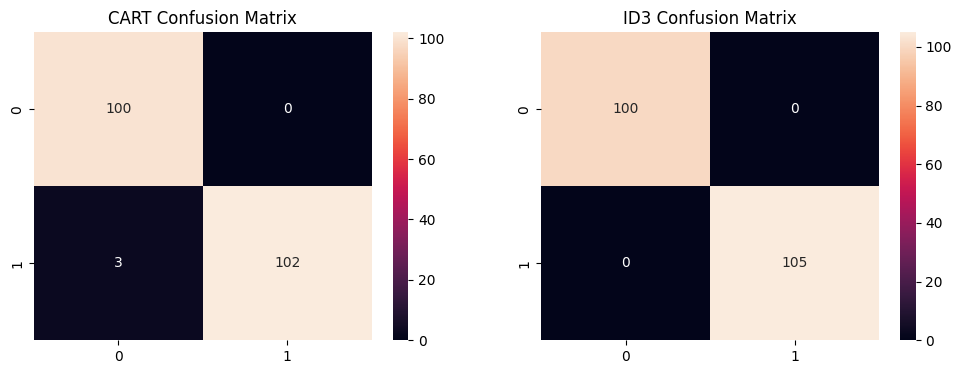

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.heatmap(confusion_matrix(y_test, y_pred_cart),
            annot=True, fmt='d', ax=ax[0])
ax[0].set_title("CART Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_id3),
            annot=True, fmt='d', ax=ax[1])
ax[1].set_title("ID3 Confusion Matrix")

plt.show()


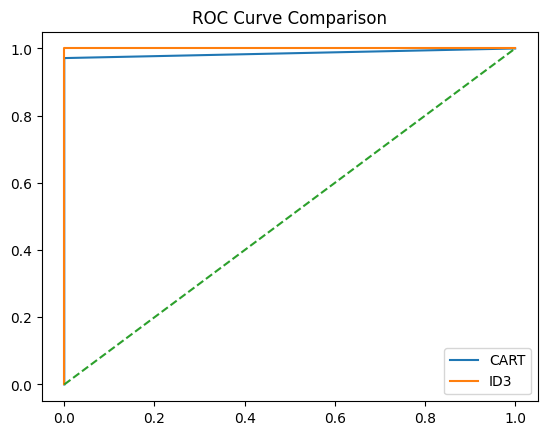

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_c, tpr_c,_ = roc_curve(y_test, y_prob_cart)
fpr_i, tpr_i,_ = roc_curve(y_test, y_prob_id3)

plt.plot(fpr_c, tpr_c, label='CART')
plt.plot(fpr_i, tpr_i, label='ID3')
plt.plot([0,1],[0,1],'--')
plt.legend()
plt.title("ROC Curve Comparison")
plt.show()


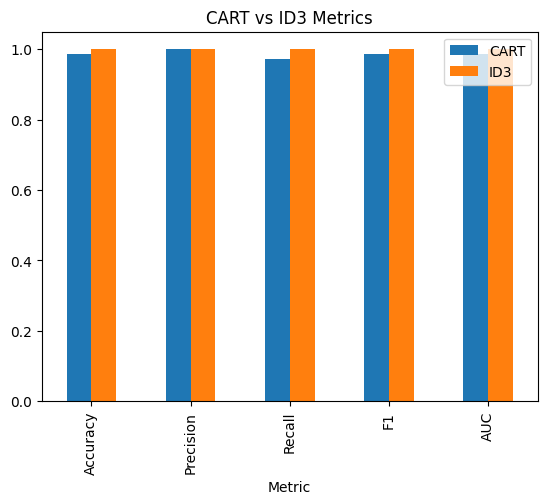

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

metrics = pd.DataFrame({
    'Metric':['Accuracy','Precision','Recall','F1','AUC'],
    'CART':[
        accuracy_score(y_test,y_pred_cart),
        precision_score(y_test,y_pred_cart),
        recall_score(y_test,y_pred_cart),
        f1_score(y_test,y_pred_cart),
        roc_auc_score(y_test,y_prob_cart)
    ],
    'ID3':[
        accuracy_score(y_test,y_pred_id3),
        precision_score(y_test,y_pred_id3),
        recall_score(y_test,y_pred_id3),
        f1_score(y_test,y_pred_id3),
        roc_auc_score(y_test,y_prob_id3)
    ]
})

metrics.set_index('Metric').plot(kind='bar')
plt.title("CART vs ID3 Metrics")
plt.show()


In [17]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)


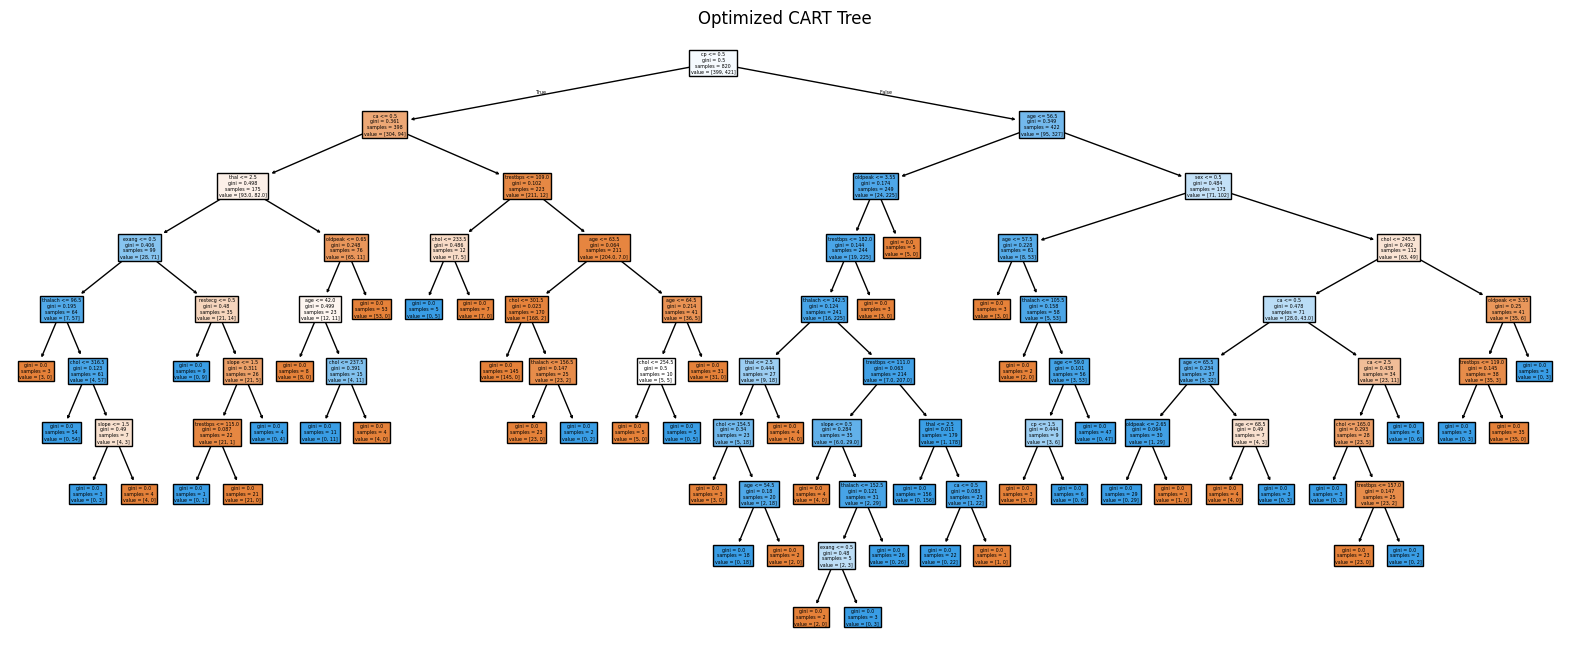

In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,8))
plot_tree(best_cart, feature_names=X.columns, filled=True)
plt.title("Optimized CART Tree")
plt.show()
